## Import necessary libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats
from scipy.stats import f_oneway, chi2_contingency, iqr, ttest_ind
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.weightstats import ztest

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
# Load the dataset
df = pd.read_csv('Hotel_Booking.csv')

## Data Cleaning

In [7]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,01-07-2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,01-07-2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,02-07-2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,02-07-2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,03-07-2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,06-09-2017,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,07-09-2017,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,07-09-2017,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,07-09-2017,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [8]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,01-07-2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,01-07-2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,02-07-2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,02-07-2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,03-07-2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [9]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,06-09-2017,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,07-09-2017,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,07-09-2017,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,07-09-2017,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,07-09-2017,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [10]:
df.shape

(119390, 36)

In [11]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

##### 1. Checking data types

In [12]:
df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [14]:
#converting to date-time format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], dayfirst=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [16]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN


##### 2. Handling Missing Values


In [17]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [18]:
df.drop(['company','agent'], axis =1, inplace = True)

In [19]:
df.dropna(inplace =True)

In [20]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [21]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [22]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


##### 3. Checking unique columns

In [23]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898
unique,2,12,5,177,7,5,10,12,3,4,3,81234,115425,118898,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Robert Smith,Michael.C@gmail.com,669-792-1661,************3627
freq,79302,13852,91863,48586,56402,97730,85601,73863,104163,89174,74745,48,6,1,28


In [24]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 

##### 4. Checking Duplicates

In [25]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
119385,False
119386,False
119387,False
119388,False


In [26]:
df.duplicated().sum()

0

##### 5. Dividing columns into categories and numericals data types

In [27]:
cat = []
num = []
date_time = []
identifier = []

for column in df.columns:
    if column in ['reservation_status_date']:
        date_time.append(column)
    elif pd.api.types.is_numeric_dtype(df[column]):
        if df[column].nunique() == df.shape[0]:
            identifier.append(column)
        elif df[column].nunique() <= 10:
            cat.append(column)
        else:
            num.append(column)
    elif pd.api.types.is_datetime64_any_dtype(df[column]):
        date_time.append(column)
    else:
        cat.append(column)

print("Categorical columns:", cat, '\n')
print("Numerical columns:", num, '\n')
print("Date/Time columns:", date_time, '\n')
print("Identifier columns:", identifier,'\n')


Categorical columns: ['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'name', 'email', 'phone-number', 'credit_card'] 

Numerical columns: ['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr'] 

Date/Time columns: ['reservation_status_date'] 

Identifier columns: [] 



## Univariate analysis

#### 1. Categorical

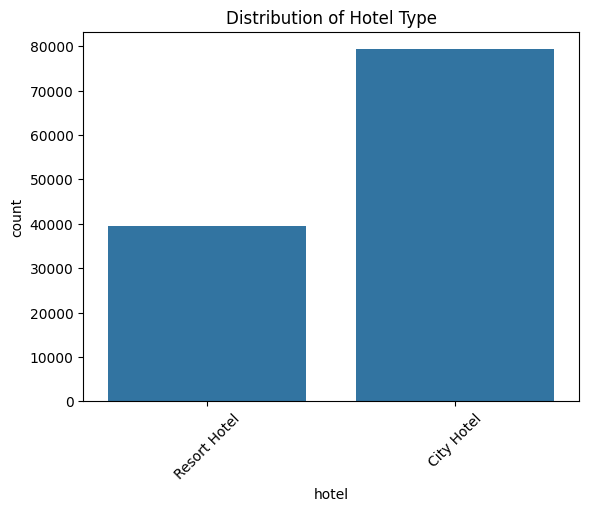

In [28]:
# Hotel Distribution
sns.countplot(x='hotel', data=df)
plt.title('Distribution of Hotel Type')
plt.xticks(rotation=45)
plt.show()

##### We can clearly see that City hostels have significantly more bookings than Resort Hotels, indicating that people prefer staying in city hotels.

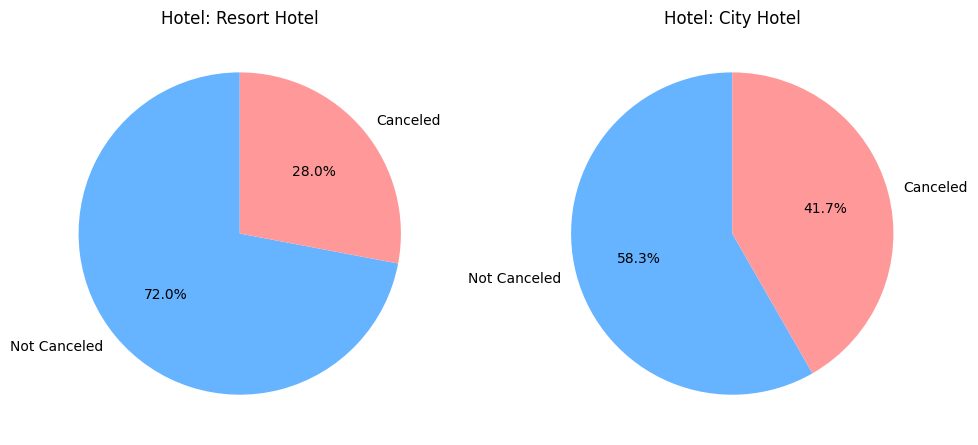

In [83]:
# Compare cancellation by resort
hotel_cancel_data = df.groupby(['hotel', 'is_canceled']).size().reset_index(name='count')
hotels = df['hotel'].unique()

fig, axes = plt.subplots(1, len(hotels), figsize=(10, 7))
for i, hotel in enumerate(hotels):
    data = hotel_cancel_data[hotel_cancel_data['hotel'] == hotel]
    labels = ['Not Canceled', 'Canceled']
    values = data['count'].values

    axes[i].pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
    axes[i].set_title(f'Hotel: {hotel}')

plt.tight_layout()
plt.show()

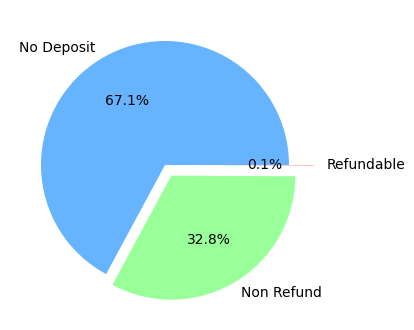

In [30]:
# Which deposit type is mostly cancelled
plt.figure(figsize=(4,6))
count = df["deposit_type"][df["is_canceled"]==1].value_counts()
deposit = count.index
explode = (0, 0.1, 0.2)[:len(deposit)]
plt.pie(count, labels=deposit, explode=explode, autopct="%.1f%%", colors=['#66b3ff', '#99ff99', '#ff9999'])
plt.show()


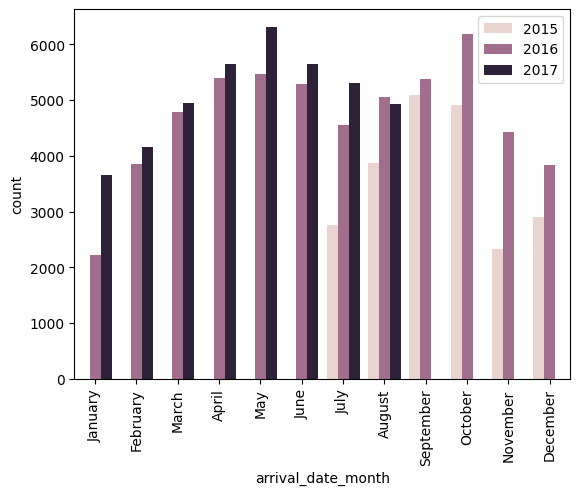

In [31]:
# Arrival Date Month Distribution
sns.countplot(x='arrival_date_month',hue='arrival_date_year',data=df,order=["January","February","March","April","May","June","July","August","September","October","November","December"])
plt.legend(['2015','2016','2017'])
plt.xticks(rotation=90)
plt.show()

##### There are clear seasonal trends in the bookings, with the highest booking activity in June to September. This suggests a peak during summer vacations, while the winter months see a decline in bookings.

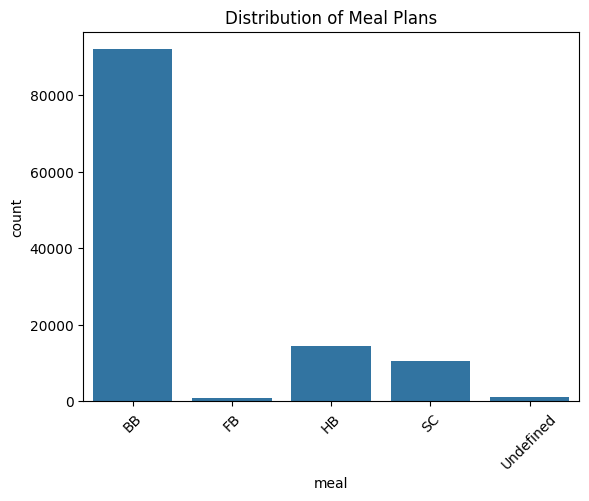

In [32]:
#Meal Distribution Plot
sns.countplot(x='meal', data=df)
plt.title('Distribution of Meal Plans')
plt.xticks(rotation=45)
plt.show()

##### The majority of the customers opt for the Bed & Breakfast (BB) meal plan, which is the most popular by a large margin.

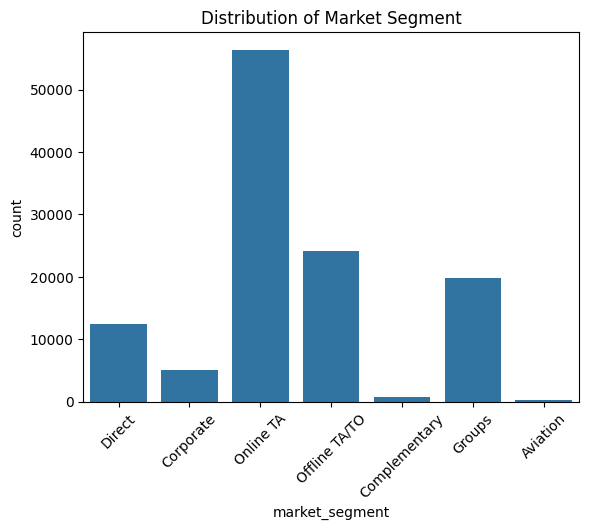

In [33]:
# Market Segment Distribution
sns.countplot(x='market_segment', data=df)
plt.title('Distribution of Market Segment')
plt.xticks(rotation=45)
plt.show()

##### This concludes that most bookings come from the Online Travel Agencies (Online TA) segment, which shows that customers prefer booking through third-party online platforms.

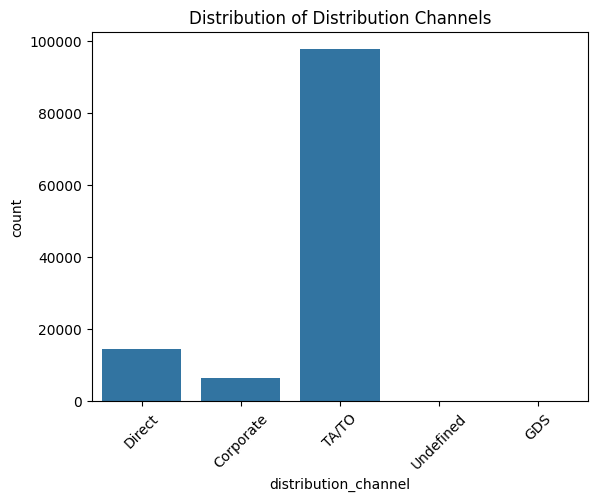

In [34]:
# Distribution Channel
sns.countplot(x='distribution_channel', data=df)
plt.title('Distribution of Distribution Channels')
plt.xticks(rotation=45)
plt.show()

##### The dominant distribution channel is Travel Agents/Tour Operators (TA/TO), followed by Direct bookings. This shows that many bookings are still made via traditional travel agents or tour operators, despite the rise in online bookings.

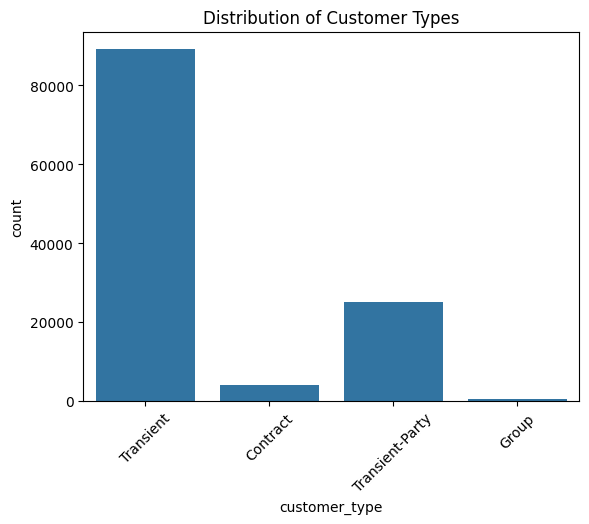

In [35]:
# Customer Type Distribution
sns.countplot(x='customer_type', data=df)
plt.title('Distribution of Customer Types')
plt.xticks(rotation=45)
plt.show()

##### The majority of customers are Transient (individuals traveling without pre-arranged group bookings). This suggests that the dataset is largely made up of solo travelers or small independent groups.

#### 2. Numerical

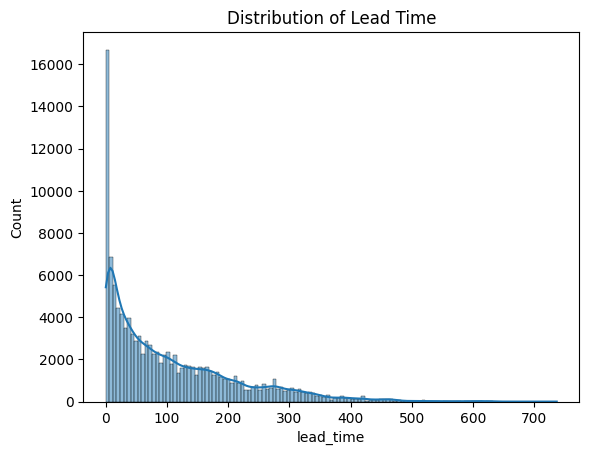

In [36]:
# Lead Time Distribution
sns.histplot(df['lead_time'], kde=True)
plt.title('Distribution of Lead Time')
plt.show()

##### The lead time distribution is skewed to the right, meaning most bookings are made with short notice. However, there are some outliers with bookings made hundreds of days in advance, likely for special occasions or long-term plans.

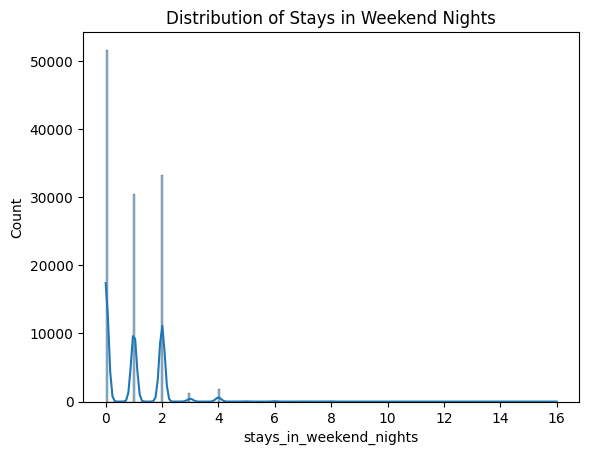

In [37]:
# Stays in Weekend Nights Distribution
sns.histplot(df['stays_in_weekend_nights'], kde=True)
plt.title('Distribution of Stays in Weekend Nights')
plt.show()

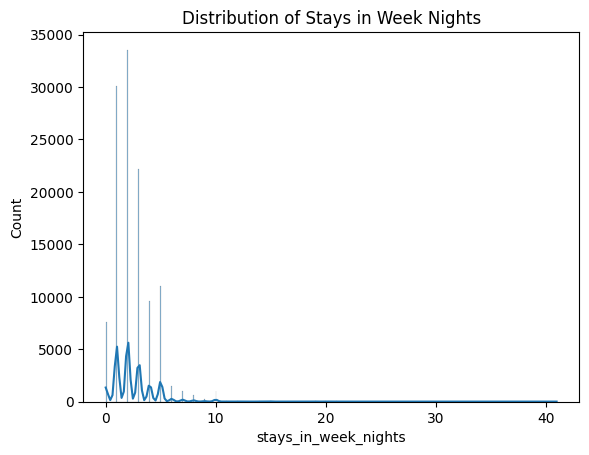

In [38]:
# Stays in Week Nights Distribution
sns.histplot(df['stays_in_week_nights'], kde=True)
plt.title('Distribution of Stays in Week Nights')
plt.show()

##### From above two plots we can conclude that most customers stay for 1-2 weekend nights, with very few staying for longer periods while the weekday stays are concentrated around 1-2 nights as well, with occasional longer stays.

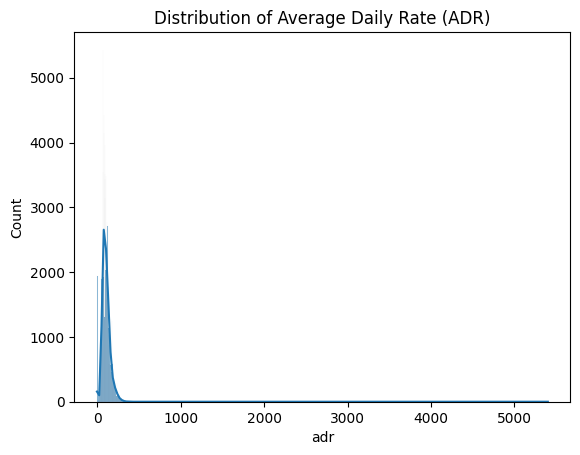

In [39]:
# ADR (Average Daily Rate) Distribution
sns.histplot(df['adr'], kde=True)
plt.title('Distribution of Average Daily Rate (ADR)')
plt.show()


##### The Average Daily Rate (ADR) is heavily right-skewed, with most values concentrated between 0 to 200.

In [40]:
# statistical summary
numerical_columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adr']

for col in numerical_columns:
    print(f'Statistics for {col}:')
    print(f'Mean: {df[col].mean()}')
    print(f'Median: {df[col].median()}')
    print(f'Standard Deviation: {df[col].std()}')
    print(f'Variance: {df[col].var()}')
    print(f'Min: {df[col].min()}')
    print(f'Max: {df[col].max()}')
    print(f'Quantiles:\n{df[col].quantile([0.25, 0.5, 0.75])}')
    print('-'*40)

Statistics for lead_time:
Mean: 104.31143501152248
Median: 69.0
Standard Deviation: 106.9033092372122
Variance: 11428.31752586702
Min: 0
Max: 737
Quantiles:
0.25     18.0
0.50     69.0
0.75    161.0
Name: lead_time, dtype: float64
----------------------------------------
Statistics for stays_in_weekend_nights:
Mean: 0.9288970377971034
Median: 1.0
Standard Deviation: 0.9962160236743446
Variance: 0.9924463658255224
Min: 0
Max: 16
Quantiles:
0.25    0.0
0.50    1.0
0.75    2.0
Name: stays_in_weekend_nights, dtype: float64
----------------------------------------
Statistics for stays_in_week_nights:
Mean: 2.5021446954532456
Median: 2.0
Standard Deviation: 1.9001677253562834
Variance: 3.6106373844856723
Min: 0
Max: 41
Quantiles:
0.25    1.0
0.50    2.0
0.75    3.0
Name: stays_in_week_nights, dtype: float64
----------------------------------------
Statistics for adr:
Mean: 102.00324252720817
Median: 95.0
Standard Deviation: 50.485862081672586
Variance: 2548.822270129666
Min: -6.38
Max: 5400.

#Bivariate analysis

### 1. Categorical & Categorical

In [41]:
# Hotel vs Market Segment
ct_hotel_market_segment = pd.crosstab(df['hotel'], df['market_segment'])
print(ct_hotel_market_segment)

# Chi-squared test
chi2, p, dof, expected = chi2_contingency(ct_hotel_market_segment)
print(f'Chi-squared Statistic: {chi2}, p-value: {p}')


market_segment  Aviation  Complementary  Corporate  Direct  Groups  \
hotel                                                                
City Hotel           237            535       2985    6091   13974   
Resort Hotel           0            199       2126    6357    5832   

market_segment  Offline TA/TO  Online TA  
hotel                                     
City Hotel              16733      38747  
Resort Hotel             7427      17655  
Chi-squared Statistic: 2363.76444987327, p-value: 0.0


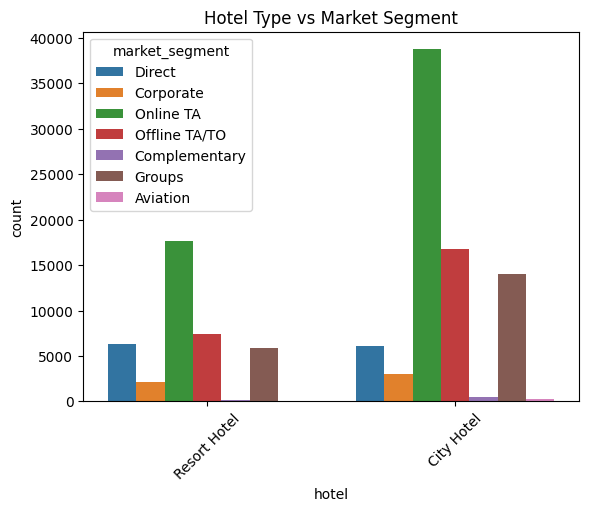

In [42]:
sns.countplot(x='hotel', hue='market_segment', data=df)
plt.title('Hotel Type vs Market Segment')
plt.xticks(rotation=45)
plt.show()

##### As p-value is zero, so we can reject the null hypothesis, concluding that there is a statistically significant difference between the observed and expected values.

In [43]:
# Hotel vs Customer Type
ct_hotel_customer_type = pd.crosstab(df['hotel'], df['customer_type'])
print(ct_hotel_customer_type)

# Chi-squared test
chi2, p, dof, expected = chi2_contingency(ct_hotel_customer_type)
print(f'Chi-squared Statistic: {chi2}, p-value: {p}')


customer_type  Contract  Group  Transient  Transient-Party
hotel                                                     
City Hotel         2300    292      59382            17328
Resort Hotel       1776    278      29792             7750
Chi-squared Statistic: 320.3714882437435, p-value: 3.875533944879264e-69


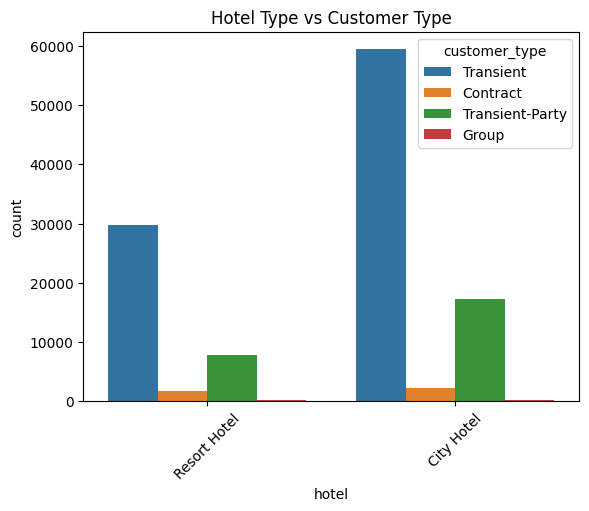

In [44]:
sns.countplot(x='hotel', hue='customer_type', data=df)
plt.title('Hotel Type vs Customer Type')
plt.xticks(rotation=45)
plt.show()

##### The Chi-squared test shows a statistically significant relationship between hotel type and customer type based on a low p-value.

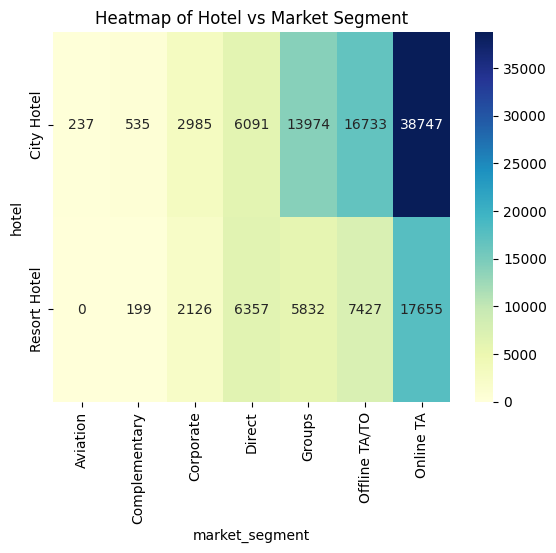

In [45]:
# Heatmap for Hotel vs Market Segment
ct_hotel_market_segment = pd.crosstab(df['hotel'], df['market_segment'])
sns.heatmap(ct_hotel_market_segment, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Hotel vs Market Segment')
plt.show()


##### The heatmap shows the intensity of bookings across the categories. City Hotels have more bookings across most market segments, especially for Online TA and Corporate bookings.

### 2. Numerical & Numerical

In [46]:
# Correlation Matrix
numerical_features = ['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights', 'total_of_special_requests']

corr_matrix = df[numerical_features].corr()
print(corr_matrix)

                           lead_time       adr  stays_in_weekend_nights  \
lead_time                   1.000000 -0.066381                 0.083984   
adr                        -0.066381  1.000000                 0.047300   
stays_in_weekend_nights     0.083984  0.047300                 1.000000   
stays_in_week_nights        0.164783  0.063628                 0.494888   
total_of_special_requests  -0.096536  0.171458                 0.071669   

                           stays_in_week_nights  total_of_special_requests  
lead_time                              0.164783                  -0.096536  
adr                                    0.063628                   0.171458  
stays_in_weekend_nights                0.494888                   0.071669  
stays_in_week_nights                   1.000000                   0.066785  
total_of_special_requests              0.066785                   1.000000  


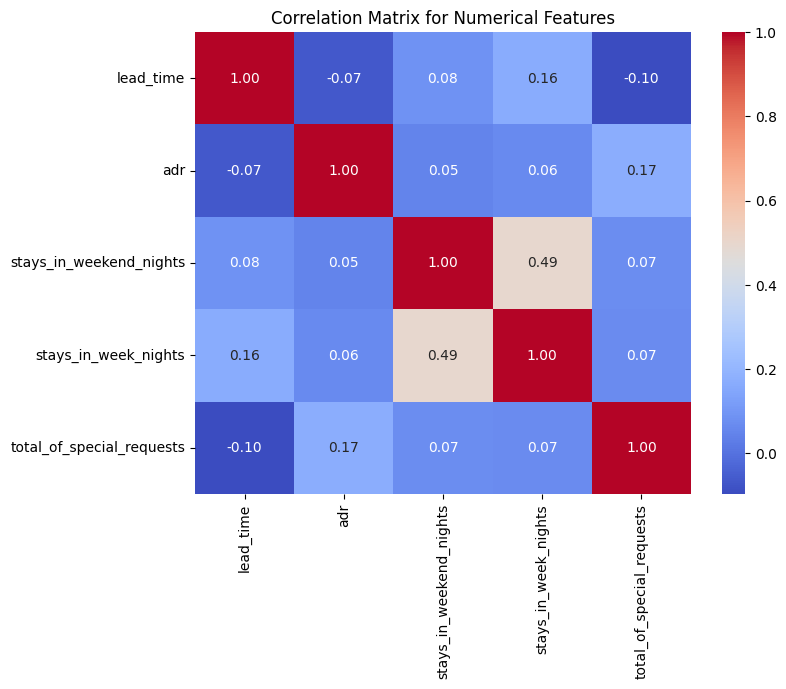

In [47]:
# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

##### Conclusion from heatmap:
- Lead Time has a moderate negative correlation with ADR suggesting that longer lead times tend to result in slightly lower daily rates.
- Stays in Week Nights and Stays in Weekend Nights have a positive correlation which indicates that guests staying longer on weekends may also stay longer during the week.
- Total of Special Requests is weakly correlated with most other variables but has a slightly positive correlation with ADR, indicating that higher-paying guests tend to make more special requests.

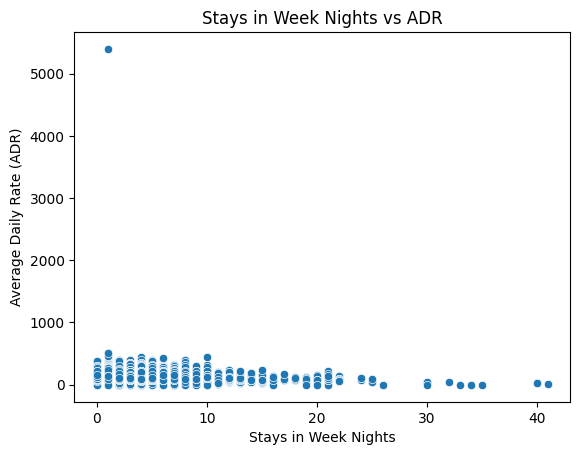

In [48]:
# Scatter plot for Stays in Week Nights vs ADR
sns.scatterplot(x='stays_in_week_nights', y='adr', data=df)
plt.title('Stays in Week Nights vs ADR')
plt.xlabel('Stays in Week Nights')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

##### There doesn’t seem to be a strong linear relationship between Stays in Week Nights and ADR, but there may be some clustering at certain ADR values, indicating specific pricing patterns for longer stays.

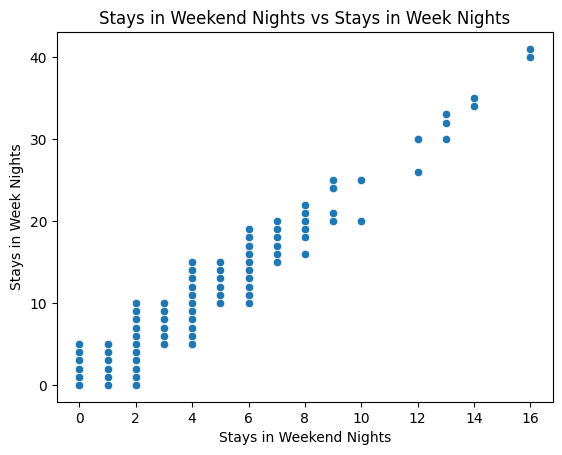

In [49]:
# Scatter plot for Stays in Weekend Nights vs Stays in Week Nights
sns.scatterplot(x='stays_in_weekend_nights', y='stays_in_week_nights', data=df)
plt.title('Stays in Weekend Nights vs Stays in Week Nights')
plt.xlabel('Stays in Weekend Nights')
plt.ylabel('Stays in Week Nights')
plt.show()

##### The scatter plot shows that some guests who stay for multiple nights during the weekend also tend to stay longer during the week.

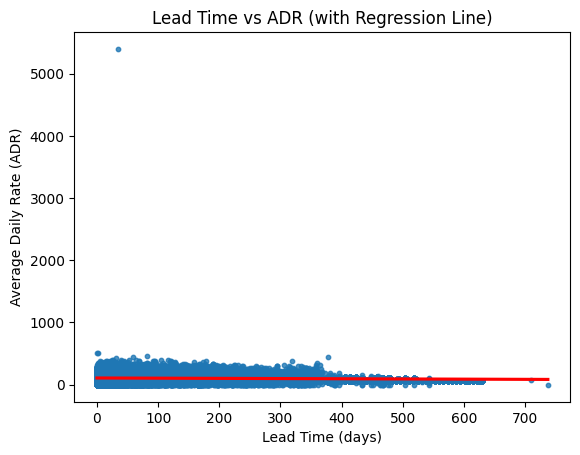

In [50]:
# Regression plot for Lead Time vs ADR
sns.regplot(x='lead_time', y='adr', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Lead Time vs ADR (with Regression Line)')
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

##### The regression plot with the red line shows a slight negative slope, confirming that longer Lead Time tends to result in lower ADR. The relationship is weak, but it's visually clear that earlier bookings often receive lower rates.

<Figure size 1000x600 with 0 Axes>

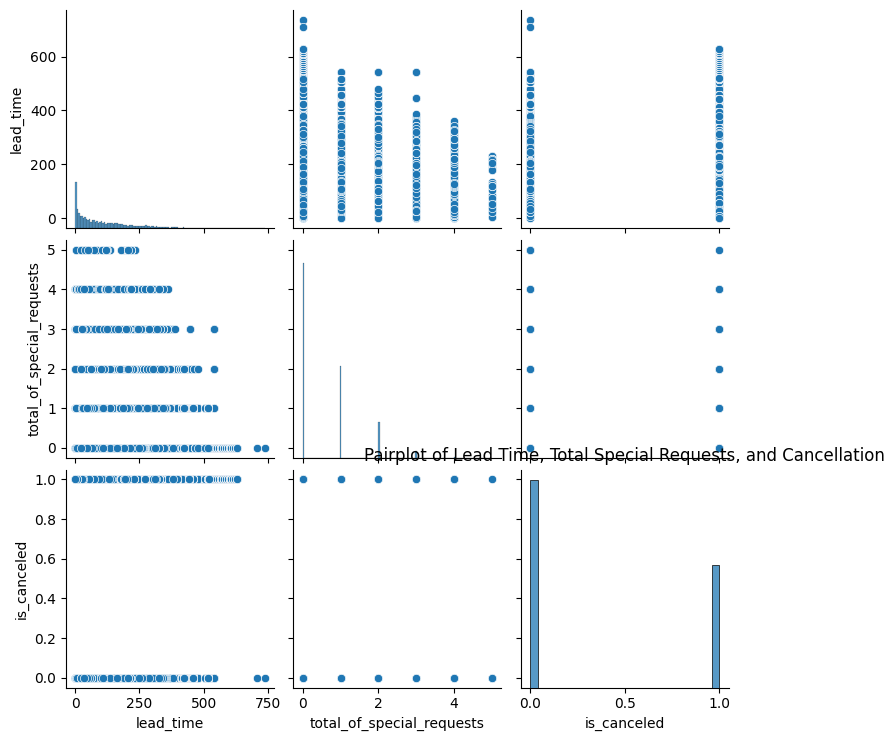

In [51]:
# Pairplot of lead time, total special requests, and cancellation
plt.figure(figsize=(10, 6))
sns.pairplot(df[['lead_time', 'total_of_special_requests', 'is_canceled']])
plt.title('Pairplot of Lead Time, Total Special Requests, and Cancellation')
plt.show()

### 3. Categorical & Numerical

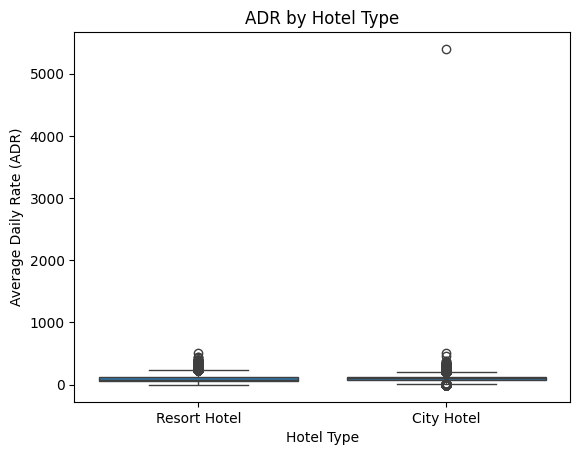

In [52]:
# Box plot: ADR by Hotel Type
sns.boxplot(x='hotel', y='adr', data=df)
plt.title('ADR by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

##### City Hotels generally have lower ADR (Average Daily Rate) compared to Resort Hotels, but there are some higher-priced outliers for both hotel types. The spread of ADR for resort hotels is much wider.

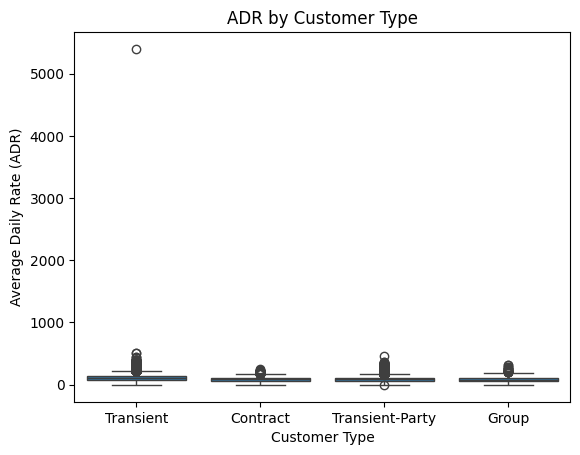

In [53]:
# Box plot: ADR by Customer Type
sns.boxplot(x='customer_type', y='adr', data=df)
plt.title('ADR by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

##### Transient customers generally pay a higher ADR compared to other customer types like Contract or Group customers.

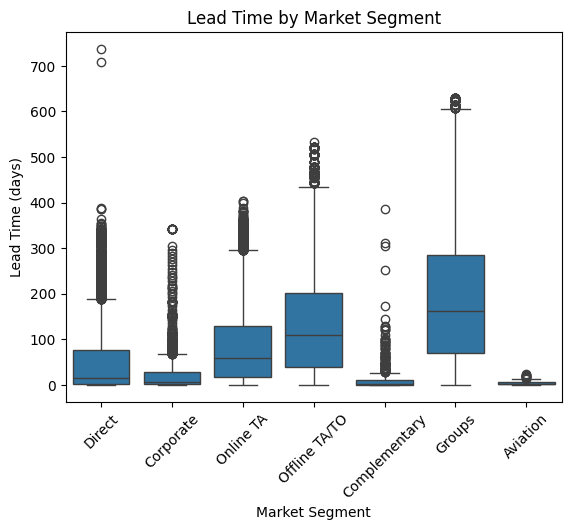

In [54]:
# Box plot: Lead Time by Market Segment
sns.boxplot(x='market_segment', y='lead_time', data=df)
plt.title('Lead Time by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Lead Time (days)')
plt.xticks(rotation=45)
plt.show()

- The Direct and Corporate market segments tend to have shorter Lead Time, while Online Travel Agents (OTA) bookings tend to be made further in advance.
- Groups also tend to book well in advance compared to direct or corporate bookings.

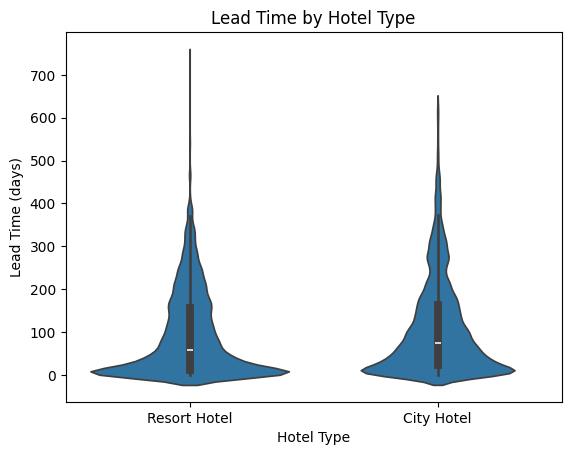

In [55]:
# Violin plot: Lead Time by Hotel Type
sns.violinplot(x='hotel', y='lead_time', data=df)
plt.title('Lead Time by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Lead Time (days)')
plt.show()

##### From the above violin plots, we can conclude that:
- Resort hotels show a wider distribution in Lead Time, with many bookings made well in advance compared to City hotels, where the lead times tend to be shorter.
- The peak density of lead time for city hotels is lower compared to resort hotels.

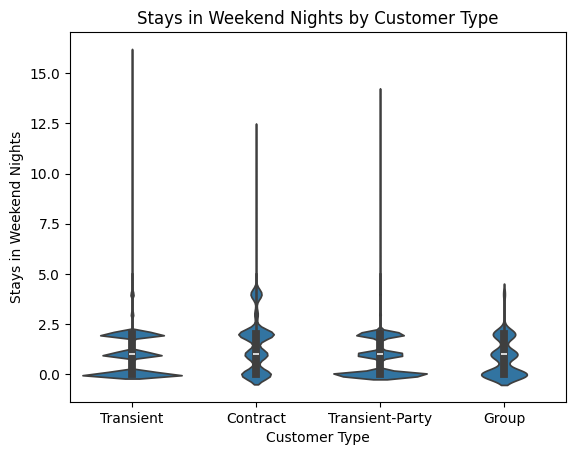

In [56]:
# Violin plot: Stays in Weekend Nights by Customer Type
sns.violinplot(x='customer_type', y='stays_in_weekend_nights', data=df)
plt.title('Stays in Weekend Nights by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Stays in Weekend Nights')
plt.show()

- Transient customers tend to stay longer on weekend nights compared to other customer types. The distribution is broader, suggesting that weekend stays vary more for this group.
- Contract customers have more consistent and shorter stays on weekend nights.

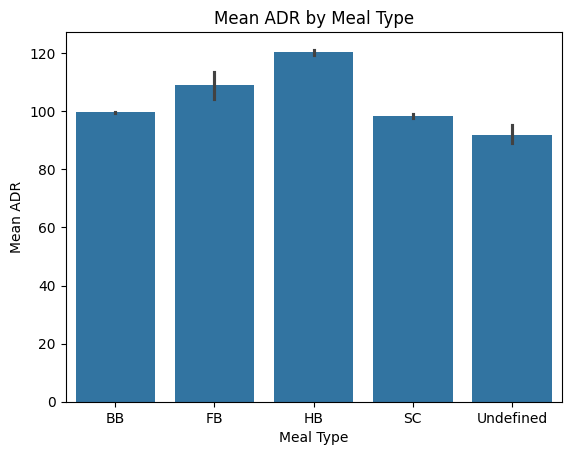

In [57]:
# Bar plot: Mean ADR by Meal Type
sns.barplot(x='meal', y='adr', data=df, estimator=np.mean)
plt.title('Mean ADR by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Mean ADR')
plt.show()

##### Guests who book the FB (Full Board) or HB (Half Board) meal types tend to pay higher ADR on average compared to those who opt for BB (Bed & Breakfast) or SC (Self Catering) meal types.

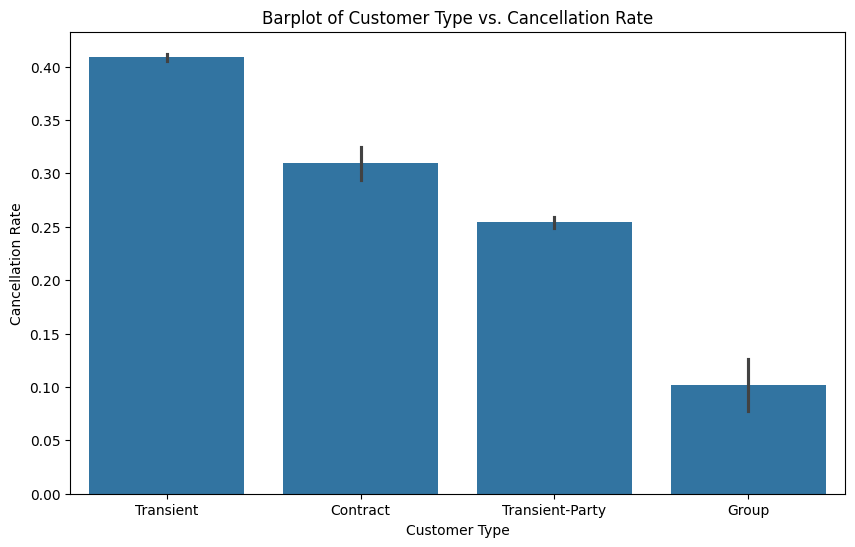

In [58]:
#barplot of Customer Type vs Cancellation Rate
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_type', y='is_canceled', data=df)
plt.title('Barplot of Customer Type vs. Cancellation Rate')
plt.xlabel('Customer Type')
plt.ylabel('Cancellation Rate')
plt.show()

 The barplot of customer type vs. cancellation rate shows that repeat customers have lower cancellation rates, suggesting that developing a loyalty program could reduce cancellations.

In [59]:
# Perform ANOVA test
anova_result = stats.f_oneway(df[df['hotel'] == 'City Hotel']['adr'],
                              df[df['hotel'] == 'Resort Hotel']['adr'])

print(f"ANOVA Test Result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")


ANOVA Test Result: F-statistic = 1040.8055363311437, p-value = 2.3451594353143216e-227


##### As p-value is less than 0.05, we can conclude that the difference in ADR between City Hotel and Resort Hotel is statistically significant.

In [60]:
# ADR comparison between City and Resort Hotel
city_adr = df[df['hotel'] == 'City Hotel']['adr']
resort_adr = df[df['hotel'] == 'Resort Hotel']['adr']

# Perform Z-test
z_stat, p_value = ztest(city_adr, resort_adr)

print(f"Z-Test Statistic: {z_stat}")
print(f"P-Value: {p_value}")


Z-Test Statistic: 32.261517886347825
P-Value: 2.4254281460047087e-228


As p-value is less than 0.05, we can conclude that the difference in ADR between City Hotel and Resort Hotel is statistically significant.

In [61]:
t_stat, p_value = ttest_ind(city_adr, resort_adr, equal_var=False)

print(f"T-Test Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Test Statistic: 28.870876032006905
P-Value: 4.898736768238337e-182


## Data Preparation

In [65]:
# Normalization
numerical_columns = ['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights']

scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df[numerical_columns].head()


,lead_time,adr,stays_in_weekend_nights,stays_in_week_nights
0,0.464043,0.001180,0.0,0.00000
1,1.000000,0.001180,0.0,0.00000
2,0.009498,0.015053,0.0,0.02439
3,0.017639,0.015053,0.0,0.02439
4,0.018996,0.019307,0.0,0.04878


In [66]:
# One-Hot Encode categorical variables
encoded_data = pd.get_dummies(df, columns=['hotel', 'meal', 'market_segment', 'customer_type', 'distribution_channel'], drop_first=True)

encoded_data.head()


,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined
0,0,0.464043,2015,July,27,1,0.0,0.00000,2,0.0,...,False,False,False,False,True,False,True,False,False,False
1,0,1.000000,2015,July,27,1,0.0,0.00000,2,0.0,...,False,False,False,False,True,False,True,False,False,False
2,0,0.009498,2015,July,27,1,0.0,0.02439,1,0.0,...,False,False,False,False,True,False,True,False,False,False
3,0,0.017639,2015,July,27,1,0.0,0.02439,1,0.0,...,False,False,False,False,True,False,False,False,False,False
4,0,0.018996,2015,July,27,1,0.0,0.04878,2,0.0,...,False,False,True,False,True,False,False,False,True,False


In [69]:
#Label encoding
label_encoder = LabelEncoder()
encoded_data['arrival_date_month'] = label_encoder.fit_transform(encoded_data['arrival_date_month'])
encoded_data['arrival_date_month'].tail()


,arrival_date_month
119385,1
119386,1
119387,1
119388,1
119389,1


In [67]:
# Box-cox transformation
numerical_features = ['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights', 'total_of_special_requests']

for feature in numerical_features:
    df[feature] = df[feature] + 1
    df[feature], fitted_lambda = stats.boxcox(df[feature])
    print(f'Box-Cox applied to {feature} with lambda: {fitted_lambda}')


Box-Cox applied to lead_time with lambda: -4.615196266541163
Box-Cox applied to adr with lambda: -29.843496153480118
Box-Cox applied to stays_in_weekend_nights with lambda: -6.704193760031362
Box-Cox applied to stays_in_week_nights with lambda: -10.000653463586431
Box-Cox applied to total_of_special_requests with lambda: -1.5470724825068485


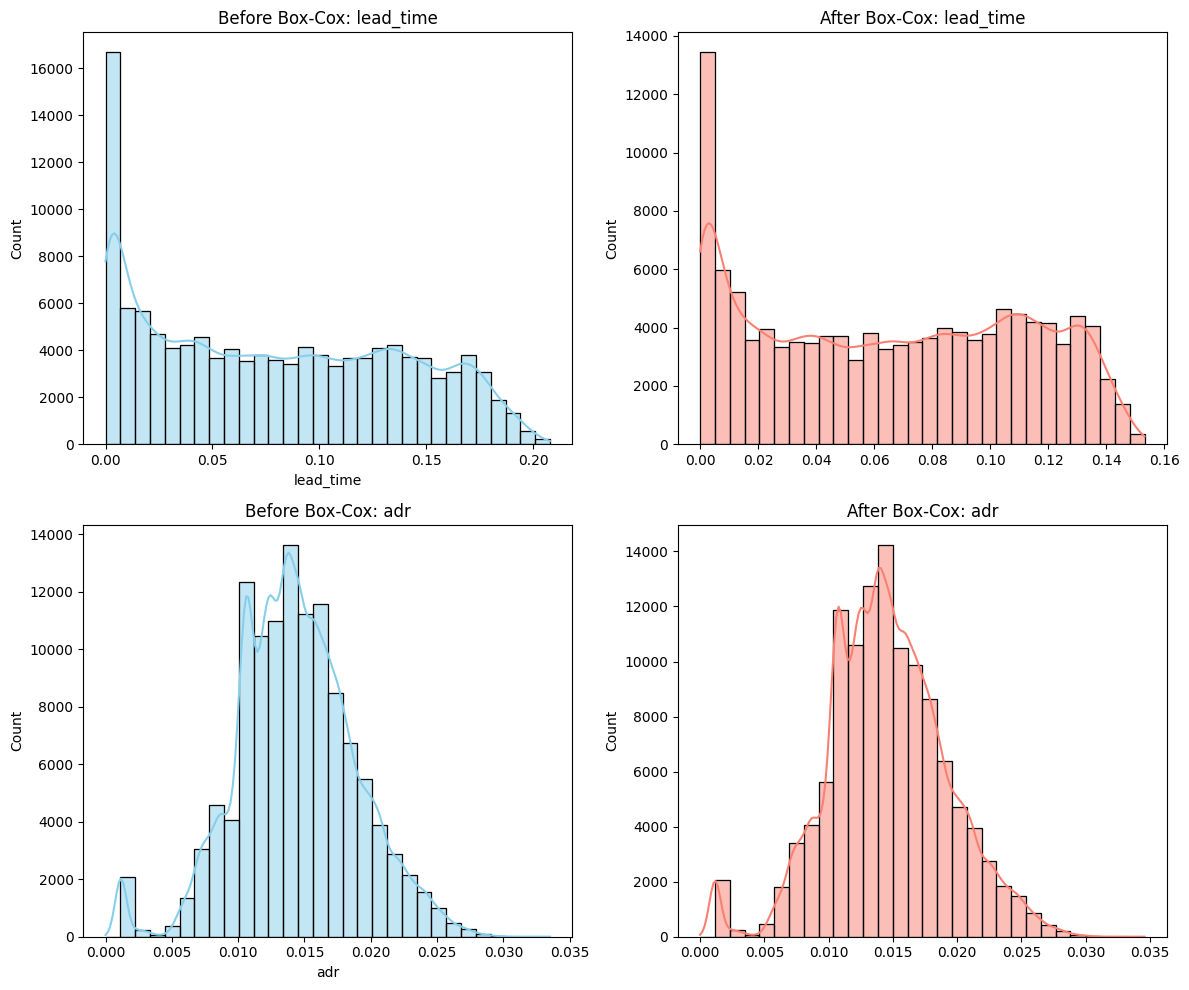

In [72]:
# Visualizing plots for any two of features
features = ['lead_time', 'adr']

# Create a 2x2 grid of subplots

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, feature in enumerate(features):
    # Original feature histogram
    sns.histplot(df[feature], bins=30, kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Before Box-Cox: {feature}')

    # Box-Cox Transformation (shift by 1 to avoid zero values)
    transformed_data, _ = stats.boxcox(df[feature] + 1)

    sns.histplot(transformed_data, bins=30, kde=True, ax=axes[i, 1], color='salmon')
    axes[i, 1].set_title(f'After Box-Cox: {feature}')

plt.tight_layout()
plt.show()


In [73]:
# Calculate skewness before and after Box-Cox transformation
for feature in ['lead_time', 'adr']:
    skew_before = df[feature].skew()
    transformed_data, _ = stats.boxcox(df[feature] + 1)

    skew_after = pd.Series(transformed_data).skew()

    print(f'{feature} Skewness:')
    print(f'Before Box-Cox: {skew_before:.4f}')
    print(f'After Box-Cox: {skew_after:.4f}')
    print('-' * 30)


lead_time Skewness:
Before Box-Cox: 0.2419
After Box-Cox: 0.0547
------------------------------
adr Skewness:
Before Box-Cox: -0.0294
After Box-Cox: 0.0021
------------------------------


##### The Box-Cox transformation reduces skewness and stabilizes variance, making the distribution more Gaussian (normal). This can improve the performance of algorithms that are sensitive to non-normal data, like linear regression.

In [77]:
# Outliers calculation

numerical_features = ['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights']
# Define a function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Define a function to detect outliers using Z-score
def detect_outliers_zscore(df, column):
    z_scores = np.abs(stats.zscore(df[column]))
    return df[z_scores > 3]



Analyzing feature: lead_time
Outliers in lead_time using IQR: (0, 36)
Outliers in lead_time using Z-score: (0, 36)


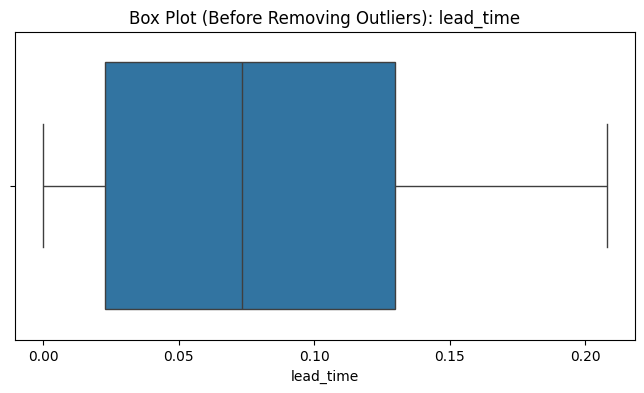

----------------------------------------
Analyzing feature: adr
Outliers in adr using IQR: (2938, 36)
Outliers in adr using Z-score: (110, 36)


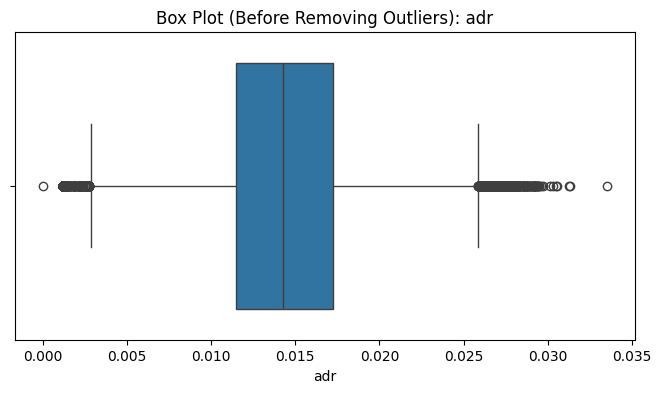

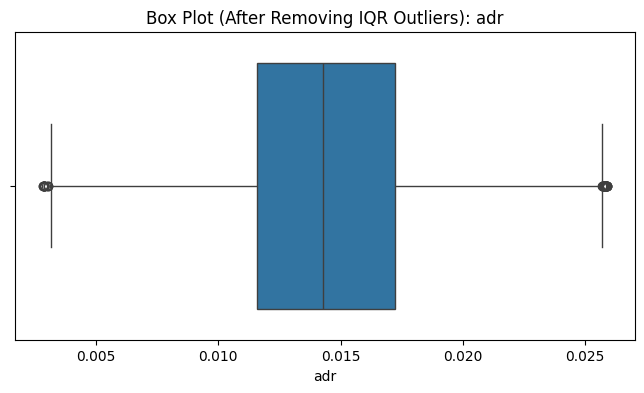

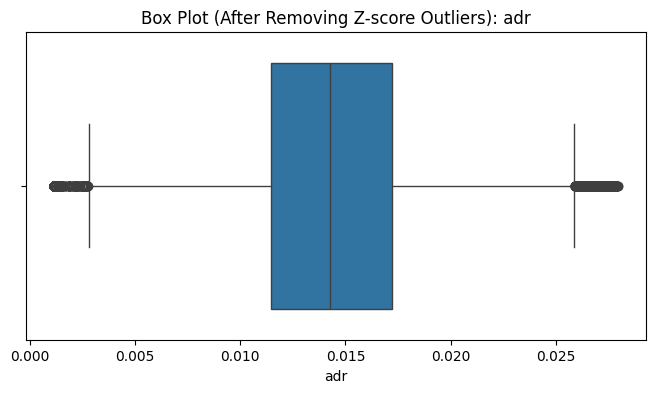

----------------------------------------
Analyzing feature: stays_in_weekend_nights
Outliers in stays_in_weekend_nights using IQR: (0, 36)
Outliers in stays_in_weekend_nights using Z-score: (0, 36)


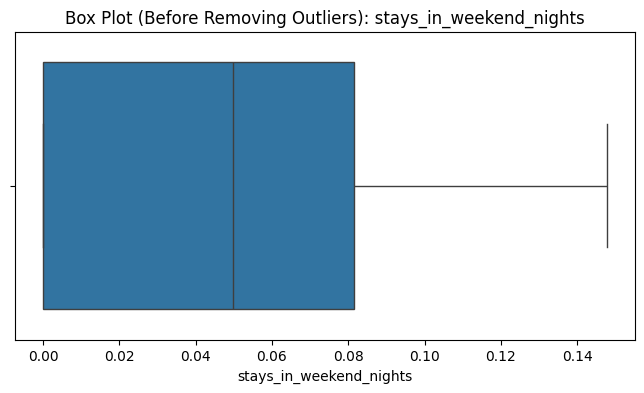

----------------------------------------
Analyzing feature: stays_in_week_nights
Outliers in stays_in_week_nights using IQR: (275, 36)
Outliers in stays_in_week_nights using Z-score: (6, 36)


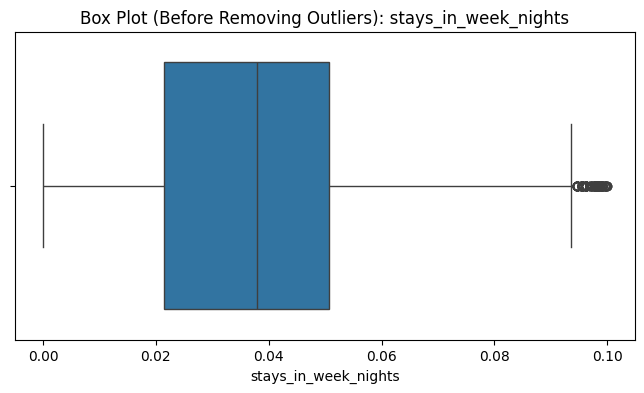

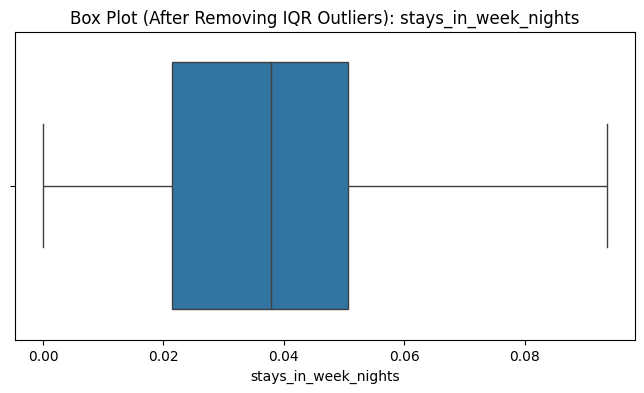

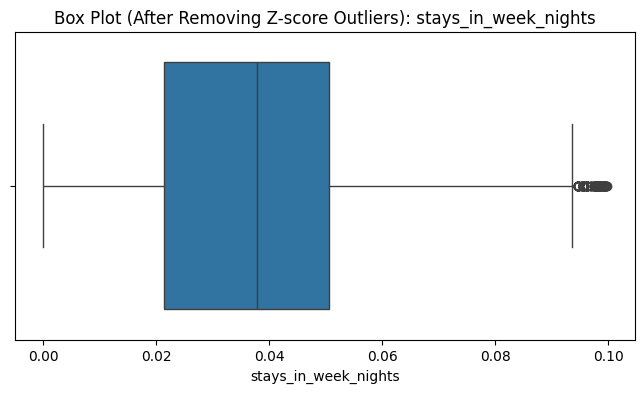

----------------------------------------


In [78]:
for feature in numerical_features:
    print(f'Analyzing feature: {feature}')

    outliers_iqr = detect_outliers_iqr(df, feature)
    print(f'Outliers in {feature} using IQR: {outliers_iqr.shape}')

    outliers_zscore = detect_outliers_zscore(df, feature)
    print(f'Outliers in {feature} using Z-score: {outliers_zscore.shape}')

    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot (Before Removing Outliers): {feature}')
    plt.show()

    if not outliers_iqr.empty:
        df_no_outliers = df[~df.index.isin(outliers_iqr.index)]
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df_no_outliers[feature])
        plt.title(f'Box Plot (After Removing IQR Outliers): {feature}')
        plt.show()

    if not outliers_zscore.empty:
        df_no_outliers_z = df[~df.index.isin(outliers_zscore.index)]
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df_no_outliers_z[feature])
        plt.title(f'Box Plot (After Removing Z-score Outliers): {feature}')
        plt.show()

    print('-' * 40)